# MANUAL DE LABORATORIO DE COMUNICACIONES DIGITALES: PYTHON
F. Javier Payán Somet, Juan José Murillo-Fuentes, José Carlos Aradillas Jaramillo \
_Departamento de Teoría de la Señal y Comunicaciones_ \
_Escuela Técnica Superior de Ingeniería_ \
_Universidad de Sevilla_ 

# Tema 7. Sistema de Comunicación Digital Lineal

**Este notebook contiene código del Tema 7**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/gapsc-us/labcomdig/blob/main/Tema7.Sistema_Comunicacion_Digital_Lineal.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Inicialización

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Numpy ≥1.16 is required
import numpy as np
assert np.__version__ >= "1.16"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore") #Ignorar warnings

## Sistema de comunicación digital binario

Las funciones que se describen aquí están en el fichero labcomdig.py y se definieron en temas anteriores, se usan a continuación por código 7.1

In [2]:
def transmisorpam(Bn,Eb,M,p,L):
    '''
    [Xn,Bn,An,phi,alfabetopam] = transmisorpam(Bn,Eb,M,p,L) 
    
    Entradas:    
     Bn = Secuencia de dígitos binarios
     Eb = Energía media por bit transmitida en Julios
     M  = Número de síímbolos del código PAM
     p  = Pulso paso de baja o paso de banda 
     L  = Número de puntos a utilizar en la representación de un símbolo
    
    Devuelve:
     Xn = la señal de información (discreta)
     Bn = La secuencia de dígitos binarios realmente transmitidos
     An = La secuencia de niveles de amplitud transmitidos
   	 phi = Pulso básico real normalizado (energía unidad)
     alfabetopam = Los niveles de amplitud asociados a cada símbolo
    '''    
    #Comprobación de parámetros de entrada
    if len(Bn)<1 or Eb<=0 or M<2 or p@p==0 or L<1:
        raise Exception('Error: revise los parámetros de entrada')
    
    # Se obtienen en primer lugar los niveles asociado a cada símbolo ¿Cuántos bits hay en cada sí­mbolo?
    k = int(np.ceil(np.log2(M)))   
    M = 2**(k) # Se Ajusta M a una potencia de dos
    
    # El alfabeto [Ver la ecuación (4.21)] 
    alfabetopam = np.sqrt(3*Eb*np.log2(M)/(M**2-1))*(2*(np.arange(M))-M+1)
    
    # Si Bn no tiene una longitud múltiplo de k, se completa con ceros
    Nb = len(Bn)  # Número de bits a transmitir, actualizado
    Bn = Bn.squeeze().astype(int) #Comprobación de int y dimensiones   
    Bn = np.r_[Bn,np.zeros(int(k*np.ceil(Nb/k)-Nb)).astype(int)] #
    Nb = len(Bn)  # Número de bits a transmitir tras la corrección
    Ns = Nb//k # Número de símbolos a transmitir
    
    # La secuencia generada
    if M>2:
        An = alfabetopam[gray2de(np.reshape(Bn,[Ns,k]))]
    else:
        An = alfabetopam[Bn]
    
    # Comprobación de las longitudes y otros datos del pulso suministrado para 
    # hacer que el número de muestras del mismo sea efectivamente L
    Ls = len(p)
    if Ls<L:
        p = np.r_[p, np.zeros(L-Ls)]
    elif Ls>L:
        print('La duración del pulso se trunca a {} muestras'.format(str(L)))
        p = p[:L] #Debe modificarse si se quiere un pulso de más de L muestras 
    # Se normaliza la energía del pulso para obtener la base del sistema
    phi = p / np.sqrt(p@p) 
       
    # Obtención del tren de pulsos, Xn = np.kron(An,phi) ó
    Xn = np.reshape(np.reshape(An,[Ns,1])*phi,[Ns*L,]) #Debe modificarse si se quiere un pulso de más de L muestras
    return [Xn,Bn,An,phi,alfabetopam]

También se necesita, en la función anterior y también presentada en un tema anterior:

In [3]:
def gray2de(b): 
    ''' 
     d = gray2de(b) Convierte cada fila de la matriz formada por dígitos binarios b
       en un vector columna, d, de los valores decimales correspondientes.
    '''
    c = np.zeros_like(b)
    c[:,0] = b[:,0]
    for i in range(1,np.shape(b)[1]):
        c[:,i] = np.logical_xor(c[:,i-1], b[:,i])
    # Convierte los bits menos significativos en los más significativos
    c = np.fliplr(c)

    #Comprueba un caso especial.
    [n,m] = np.shape(c) 
    if np.min([m,n]) < 1:
        d = []
        return
    d = np.dot(c, 2**np.arange(m))
    return d

También se necesita, en el código abajo, la función Qfunct, introducida en temas anteriores:

In [4]:
def Qfunct(x):
    ''' 
     y = Qfunct(x) evalúa la función Q en x.
    Donde y = 1/sqrt(2*pi) * integral desde x hasta inf de exp(-t^2/2) dt
    '''
    from scipy.special import erfc 
    from numpy import sqrt
    y=(1/2)*erfc(x/sqrt(2)) 
    return y

**Código 7.1** Sistema de comunicación digital binario.

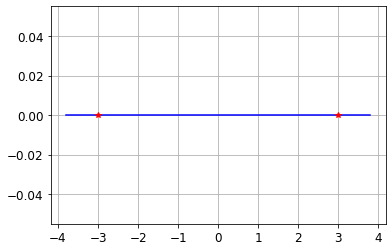

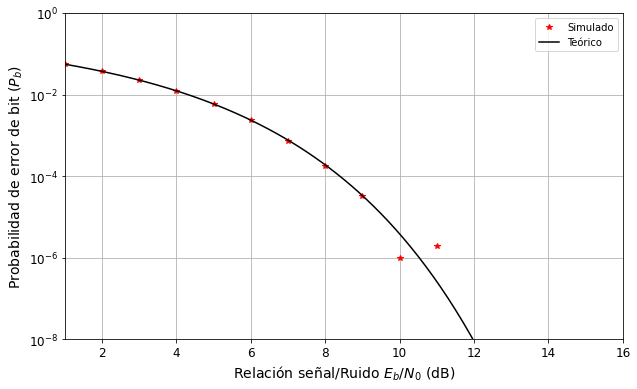

In [5]:
#%% Inicialización
Nb = 10**6 # Nb = Nº de bits a transmitir
Eb = 9 # Eb = Energía media transmitida en Julios
M = 2
L = 4 # L =  Nº de puntos que vamos a utilizar para transmitir un bit

# Definición del pulso básico. 
p = np.ones(L)

#%% Secuencia binaria generada por la fuente
Bn = np.random.randint(2,size=Nb)  # Bn = Secuencia de dígitos binarios

#%% Transmisor PAM
[Xn,Bn,An,phi,alfabeto] = transmisorpam(Bn,Eb,M,p,L)
# Actualiza el valor de Nb
Nb = len(Bn)

#%% Receptor Vectorial
# Alternativa 1) receptor vectorial usando filtros
#hr = np.flipud(phi) #Respuesta impulsiva del filtro adaptado
#yn = np.convolve(hr,Xn,'valid') # Salida del filtro adaptado
#sn = yn[np.arange(0,Nb*L,L)] # El resultado de muestrear la señal anterior
     
# Alternativa 2) receptor vectorial usando correlación
sn = np.reshape(Xn,[Nb,L]) @ phi 

#%%Representación de la Constelación
# Se obtienen valores únicos
sx = np.unique(sn)
xmax = max(sx)+max(sx)/10+0.5
xmin = -(abs(min(sx))+abs(min(sx))/10)-0.5

plt.figure(71)
plt.plot([xmin,xmax],[0,0],'b-'); # Se representan los ejes
plt.plot(sx,np.zeros(len(sx)), 'r*') # Se representa la constelación
plt.grid()

# Distancia mínima de la constelación
dmin = abs(sx[0]-sx[0])

#%% Estimación mediante simulación de Monte Carlo de la tasa de error de bit
SNRdb = np.arange(20)  # SNR en dB donde estimar la BER estimada por MC

# Inicialización
berSimulado = np.zeros(len(SNRdb))

for ii in range(len(SNRdb)):
    # Generamos ruido
    SNR = 10**(SNRdb[ii]/10) # relación señal ruido en unidades naturales
    varzn = Eb/(2*SNR) #varianza del ruido
    # El ruido del canal
    Wn = np.sqrt(varzn)*np.random.randn(np.size(Xn))
    
    # Salida del Canal AWGN: señal más el ruido
    rn = Xn + Wn
    
    #Salida del Receptor Vectorial
    #Alternativa 1, receptor vectorial basado en filtros
    #vn = np.convolve(hr, rn, 'valid') # Filtrado por filtro adaptado
    #r = vn[np.arange(0,Nb*L,L)]  # Se muestrea

    #Alternativa 2, receptor vectorial basado en correlador
    r = np.reshape(rn,[Nb,L]) @ phi  

    #Salida del Detector. El umbral está situado en sx(1)+sx(2))/2
    correctos = (r>(sx[0]+sx[1])/2) == (Bn) #ó = np.equal(r>(sx[0]+sx[1])/2,Bn)
    
    #Estimamos la tasa de error de bit para esa SNR
    errores = Nb-np.sum(correctos)
    berSimulado[ii]=errores/Nb #BER para SNRdb[ii]
    
#%% Cálculo de BER teórica    
SNRdb2 = np.arange(20, step=0.1)  #SNR donde calcular la BER teórica
SNR2 = 10**(SNRdb2/10) #Paso a unidades naturales
berTeorico = Qfunct(np.sqrt(2*SNR2))

#%% Representación de las probabilidades de error
plt.figure(72,figsize = (10,6))
plt.semilogy(SNRdb,berSimulado,'r*');
plt.semilogy(SNRdb2,berTeorico,'k-');
plt.axis([1, 16, 10**(-8), 1]), plt.grid()
plt.xlabel('Relación señal/Ruido $E_b/N_0$ (dB)')
plt.ylabel('Probabilidad de error de bit ($P_b$)')
plt.legend(['Simulado','Teórico'],loc='best') # Crea leyenda
plt.show()

##  Sistema de comunicación digital M-PAM


En este tema se presentan las siguientes funciones:

**Código 7.2** Función detecta

In [6]:
def detecta(r, alfabeto):
    '''
    An = detecta(r, alfabeto)
    r = secuencia a la entrada del detector, con estimaciones de s_i
    alfabeto = tabla con los niveles de amplitud/sí­mbolos  
    
    Genera:
    An = una secuencia de sí­mbolos pertenecientes al alfabeto de acuerdo con
    una regla de distancia euclidiana mí­nima (mí­nima distancia)
    '''
    
    # Longitud de la secuencia                
    N = len(r)
    
    # Inicializa
    An = np.zeros(N)
    
    for i in range(N):
        ind = np.argmin(abs(r[i]-alfabeto)) #ind = np.where(abs(r[i]-alfabeto) == np.amin(abs(r[i]-alfabeto)))
        An[i] = alfabeto[ind]
    
    return An


**Código 7.3** Función detecta Sin el Bucle For.

In [7]:
def detectaSBF(r,alfabeto):
    '''
    An = detectaSBF(r,alfabeto)
    r = secuencia a la entrada del detector, con estimaciones de s_i
    alfabeto = tabla con los niveles de amplitud/símbolos  
    
    Genera:
    An = una secuencia de sí­mbolos pertenecientes al alfabeto de acuerdo con
    una regla de distancia euclidiana mínima (mínima distancia)
    '''

    # Obtiene el índice respecto al alfabeto
    ind = map(lambda i: np.argmin(abs(r[i] - alfabeto)), range(len(r)))
    
    # Genera la secuencia de niveles detectados
    An = alfabeto[list(ind)]
    
    return An

**Código 7.4** Función simbolobit.

In [8]:
def simbolobit(An,alfabeto):
    '''
    Bn = simbolobit(An, alfabeto)
    An = secuencia de símbolos pertenecientes al alfabeto
    alfabeto = tabla con los símbolos utilizados en la transmisión 
    Bn = una secuencia de bit, considerando que los símbolos se habían
    generado siguiendo una codificación de Gray
    '''
    
    k = np.log2(len(alfabeto)) # bits por símbolo
    
    if k>1:
        distancia = abs(alfabeto[0]-alfabeto[1])
        indices   = np.round((An-alfabeto[0])/distancia)
        Bn        = np.reshape(de2gray(indices,k),[int(k*len(An))])
    else:
        Bn = ((An/max(alfabeto))+1)/2
    
    return Bn

En esta función se hace una llamada a la función de2gray utilizando la librería *sympy*.
Su código es el siguiente:

**Código 7.5** Función de2gray.

In [9]:
def de2gray(d,n):
    """
    b = de2gray(d,n)
    Convierte un número decimal, d, en un vector binario, b, de longitud n
    """ 
    from sympy.combinatorics.graycode import GrayCode
    
    gray_list_str = list(GrayCode(n).generate_gray())
    gray_list = list(map(lambda ind: np.array(list(gray_list_str[ind]), dtype=np.int), range(len(gray_list_str))))
    b = list(map(lambda ind: gray_list[int(d[ind])], range(0,len(d))))
    
    return np.array(b)

 Finalmente
 
**Código 7.6** Sistema de comunicación digital M-PAM.



Simulando sistema PAM con M=2
 Simulando SNR = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, Calculando tasa de error de símbolo teórica
Calculando tasa de error de bit teórica
Representando resultados


Simulando sistema PAM con M=4
 Simulando SNR = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, Calculando tasa de error de símbolo teórica
Calculando tasa de error de bit teórica
Representando resultados


Simulando sistema PAM con M=8
 Simulando SNR = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, Calculando tasa de error de símbolo teórica
Calculando tasa de error de bit teórica
Representando resultados


Simulando sistema PAM con M=16
 Simulando SNR = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, Calculando tasa de error de símbolo teórica
Calculando tasa de error de bit teórica
Representando resultados


Simulando sistema PAM con M=32
 Simulando SNR = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,

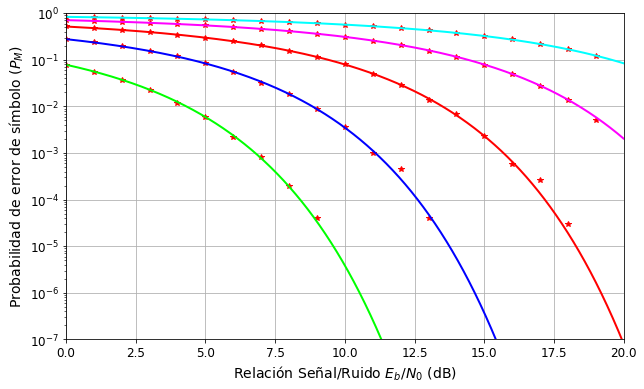

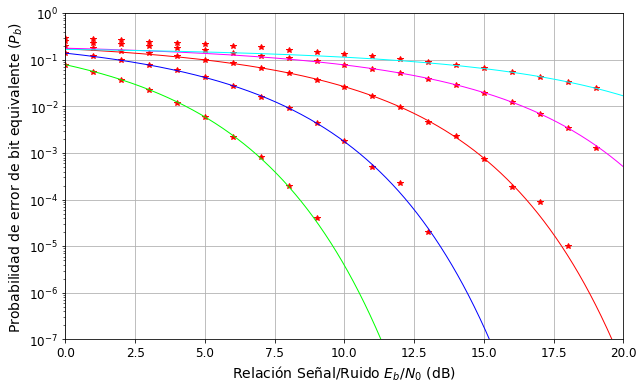

In [10]:
#%% Inicialización
verbose = 1 # Para indicar por pantalla el progreso de la ejecución
L = 4 #Número de muestras por símbolo transmitidas
Nb = 10**5  #Número de bits a transmitir
Eb = 9 #Energía promedo de bit
p = np.ones(L) # definamos el pulso básico
#Colores RGB para representa curvas:
codigocolor = np.array([[0,0,0], [0,1,0], [0,0,1], [1,0,0], [1,0,1], [0,1,1]])
jj=0 # variable auxiliar para bucle for

#%% Calculamos para cada M la estimación mediante simulación de la probabilidad
# de error de símbolo y de bit equivalente
for M in np.array([2, 4, 8, 16, 32]):
    if verbose: print('\n\nSimulando sistema PAM con M={}'.format(M))
    jj = jj+1;
    Bn = np.random.randint(2,size=Nb)   
    
    [Xn,Bn,An,phi,alfabeto] = transmisorpam(Bn,Eb,M,p,L)
    #[Secuencia Tx, Bits Tx, Símbolos Tx, pulso usado, constelación]

    Nb = len(Bn) #Número de bits transmitidos
    Ns = len(An) #Número de símbolos transmitidos

    # Definamos la relación señal ruido en dB y otros elementos 
    SNRdb = np.arange(20)
    serSimulada = np.zeros(len(SNRdb))
    berSimulada = np.zeros(len(SNRdb))
    if verbose: print(' Simulando SNR = ', end = '')
    for ii in range(len(SNRdb)):
        if verbose: print('{}, '.format(SNRdb[ii]), end = '')
        SNR = 10**(SNRdb[ii]/10)
        varzn = Eb/(2*SNR)
    
        # El ruido (AWGN) 
        Wn = np.sqrt(varzn)*np.random.randn(np.size(Xn))
        
        # Salida del Canal AWGN: la señal Tx más el ruido
        rn = Xn + Wn
    
        # Salida del Receptor Vectorial o Demodulador, usando correlador
        r = np.dot(np.reshape(rn,[Ns,L]), phi)

        # Salida del Detector 
        Andetectado = detectaSBF(r, alfabeto) #Símbolos detectados
        erroresSimbolo = Ns-sum(Andetectado==An) # Nº Errores de símbolo
        serSimulada[ii] = erroresSimbolo/Ns  
        
        Bndetectado = simbolobit(Andetectado, alfabeto) #Bits detectados
        erroresBit = Nb-sum(Bndetectado==Bn) # Nº Errores de bit
        berSimulada[ii] = erroresBit/Nb
  
    # Cálculo de la probabilidad o tasa de error teórico
    SNRdb2 = np.arange(20, step=0.01) #SNR donde calcular la BER teórica
    SNR2 = 10**(SNRdb2/10) #paso a unidades naturales
    if verbose: print('Calculando tasa de error de símbolo teórica')      
    serTeorico = (2*(M-1)/M)*Qfunct(np.sqrt((6*np.log2(M)/(M**2-1))*SNR2))
    if verbose: print('Calculando tasa de error de bit teórica') 
    berTeorico = serTeorico/np.log2(M)

    # Representación de las tasas de error de símbolo y bit, teórica y simuladas
    if verbose: print('Representando resultados')  
    color = codigocolor[jj,:]  
    plt.figure(73,figsize=(10,6))  # SER 
    plt.semilogy(SNRdb,serSimulada,'r*')
    plt.semilogy(SNRdb2,serTeorico,'-k',color=color, linewidth=2)
    plt.axis([0,20,10**-7,1])
    plt.grid()
    plt.xlabel('Relación Señal/Ruido $E_b/N_0$ (dB)');
    plt.ylabel('Probabilidad de error de símbolo ($P_M$)');
    plt.figure(74,figsize=(10,6)) # BER 
    plt.semilogy(SNRdb,berSimulada,'r*')
    plt.semilogy(SNRdb2,berTeorico,'-k',color=color, linewidth = 1)
    plt.axis([0,20,10**-7,1])
    plt.grid()
    plt.xlabel('Relación Señal/Ruido $E_b/N_0$ (dB)')
    plt.ylabel('Probabilidad de error de bit equivalente ($P_b$)')

plt.show()